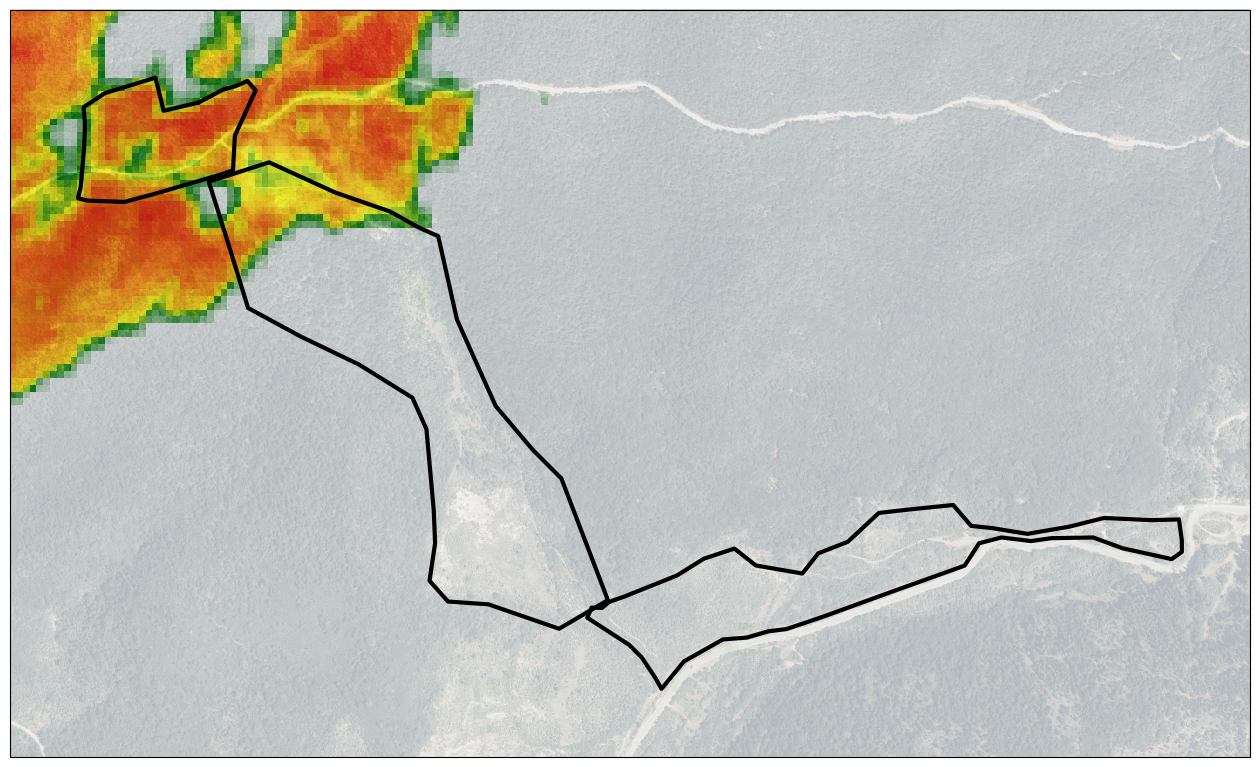

In [27]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib

dNBR = rasterio.open('BRUTOS/dNBR/dNBR_leyre.tif')
zonas = gpd.read_file('shp/zonas_estudio.shp')
zona = zonas[zonas.Id == 2]

proj = ccrs.epsg(25830)

fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=proj)

buffer = 100

# minx, miny, maxx, maxy = zona.iloc[0].geometry.bounds
minx, miny, maxx, maxy = zonas.total_bounds

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange","yellow", "green", "white"])
ax.set_extent([minx - buffer, maxx + buffer, miny - buffer, maxy + buffer], crs=proj)
zonas.plot(ax=ax, facecolor='None', linewidth=3, edgecolor='black')
show(dNBR, ax=ax, cmap=cmap)
ax.add_wms(wms='https://www.ign.es/wms-inspire/pnoa-ma', layers=['OI.OrthoimageCoverage'], alpha=0.3)
plt.savefig('FINALES/dNBR/dNBR.png', bbox_inches='tight')